# Linear SVC

## Read Dataset

In [1]:
import pandas as pd
data = pd.read_csv("apples_and_oranges.csv")
data.head()

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange


## Check for Null Values

In [2]:
data.isnull().sum()

Weight    0
Size      0
Class     0
dtype: int64

## Treating the Categorical Variable

In [3]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data.Class=le.fit_transform(data.Class)
data.head()

,Weight,Size,Class
0,69,4.39,1
1,69,4.21,1
2,65,4.09,1
3,72,5.85,0
4,67,4.70,1


## Sampling the Dataset

In [4]:
from sklearn.model_selection import train_test_split
#converted to numpy array just for the prupose of plotting
X = data[['Weight','Size']].values
y=data.Class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Building the Linear SVC Classifier

In [5]:
from sklearn.svm import LinearSVC
import warnings
warnings.simplefilter("ignore")
classifier = LinearSVC()
classifier.fit(X_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

## Calculating Training Accuracy

In [6]:
from sklearn.metrics import accuracy_score
train_pred=classifier.predict(X_train)
print("Training Accuracy=",accuracy_score(y_train,train_pred))


Training Accuracy= 0.8125


## Inference: The model has learnt well. The LinearSVC classifier can now be tested on Test data

## Calculating Test Accuracy

In [7]:
Y_pred = classifier.predict(X_test)
print("Testing Accuracy=",accuracy_score(y_test,Y_pred))

Testing Accuracy= 1.0


### Inference: The model performs well for the test data. 

## Other Model Evaluation Metrics <br> Confusion Matrix

In [8]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,Y_pred))

[[5 0]
 [0 3]]


## Inference: The FP and FN are 2 out of 8. It represents 25% misclassification.

## Classification Report

In [9]:
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         3

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



## The Precision rate is also Good

## Plotting the Decision boundary of the Classifier

Text(0.5, 1.0, 'SVM Decision Region Boundary')

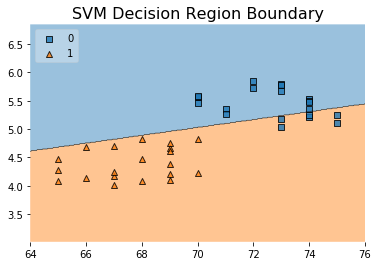

In [10]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import matplotlib.pyplot as plt
plot_decision_regions(X,np.array(y),
                      clf=classifier, 
                      legend=2)
plt.title('SVM Decision Region Boundary', size=16)

([0.3333333333333333,
  0.6666666666666666,
  0.5555555555555556,
  0.4166666666666667,
  0.375,
  0.5263157894736842,
  0.36363636363636365,
  0.52,
  0.39285714285714285,
  0.3125],
 [0.625, 0.375, 0.375, 0.625, 0.625, 0.375, 0.25, 0.375, 0.5, 0.125])

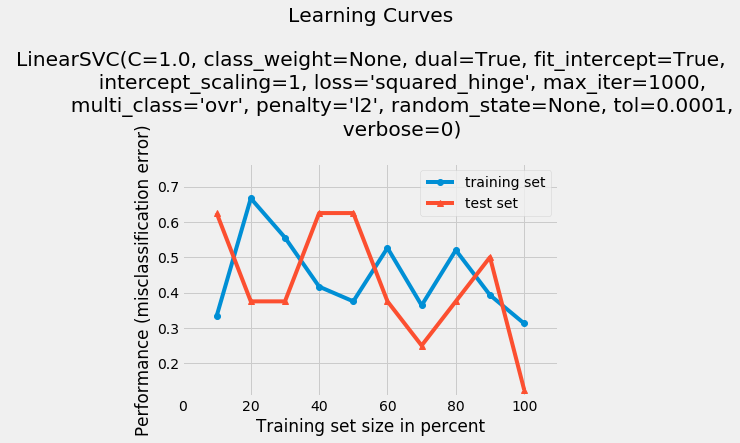

In [14]:
from mlxtend.plotting import plot_learning_curves
plot_learning_curves(X_train,y_train,X_test,y_test,classifier,
                     scoring='misclassification error')
# Scoring can be {'accuracy', 'average_precision', 'f1_micro', 'f1_macro', 'f1_weighted', 'f1_samples', 'log_loss', 'precision', 'recall', 'roc_auc', 'adjusted_rand_score', 'mean_absolute_error', 'mean_squared_error', 'median_absolute_error', 'r2'}

In [15]:
classifier.support_vectors_

AttributeError: 'LinearSVC' object has no attribute 'support_vectors_'